<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#library-import" data-toc-modified-id="library-import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>library import</a></span></li><li><span><a href="#Image-Processing" data-toc-modified-id="Image-Processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Image Processing</a></span></li><li><span><a href="#working-with-train-data" data-toc-modified-id="working-with-train-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>working with train data</a></span></li><li><span><a href="#Feature-Extraction-/-Dimensionality-Reduction" data-toc-modified-id="Feature-Extraction-/-Dimensionality-Reduction-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Extraction / Dimensionality Reduction</a></span></li><li><span><a href="#simple-model" data-toc-modified-id="simple-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>simple model</a></span><ul class="toc-item"><li><span><a href="#MLP" data-toc-modified-id="MLP-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>MLP</a></span></li><li><span><a href="#SVC" data-toc-modified-id="SVC-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>SVC</a></span></li></ul></li><li><span><a href="#Hyper-parameter-tuning-and-cross-validation-using-train-data" data-toc-modified-id="Hyper-parameter-tuning-and-cross-validation-using-train-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Hyper-parameter tuning and cross validation using train data</a></span></li><li><span><a href="#Full-process-on-train-data-using-Pipeline" data-toc-modified-id="Full-process-on-train-data-using-Pipeline-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Full process on train data using Pipeline</a></span></li><li><span><a href="#model-evaluation-using-test-data" data-toc-modified-id="model-evaluation-using-test-data-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>model evaluation using test data</a></span></li><li><span><a href="#saving-model-and-loading-model" data-toc-modified-id="saving-model-and-loading-model-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>saving model and loading model</a></span><ul class="toc-item"><li><span><a href="#saving-model" data-toc-modified-id="saving-model-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>saving model</a></span></li><li><span><a href="#loading-model" data-toc-modified-id="loading-model-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>loading model</a></span></li></ul></li></ul></div>

# library import

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
import os
from skimage import io

```
from google.colab import drive
drive.mount('/content/drive')

import os
os.getcwd()
os.chdir('./drive/MyDrive/CropDisease')
os.listdir()
```

# Image Processing

In [4]:
image = io.imread('Datasets/crops_trainAugmented/Bacterial_leaf_blight/0.2DSC_0365.jpg')
image.shape

(228, 228, 3)

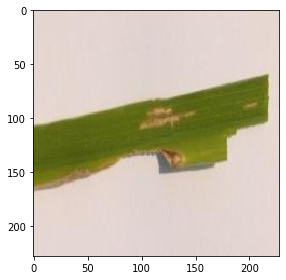

In [5]:
io.imshow(image)

In [6]:
image1 = io.imread('Datasets/crops_trainAugmented/Bacterial_leaf_blight/0.2DSC_0366.jpg')
image1.shape

(228, 228, 3)

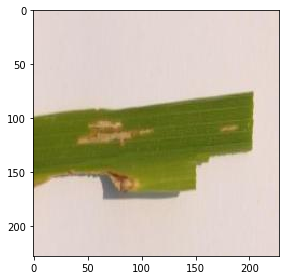

In [7]:
io.imshow(image1)

(64, 64, 3)


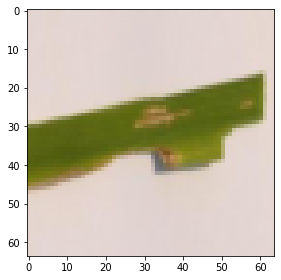

In [8]:
from skimage import transform
resized = transform.resize(image, output_shape=(64,64))
print(resized.shape)
io.imshow(resized)

(28, 28, 3)


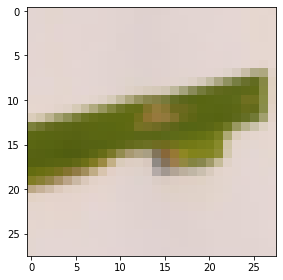

In [9]:
resized2 = transform.resize(image, output_shape=(28,28))
print(resized2.shape)
io.imshow(resized2)

In [10]:
class PreProcessor:
    def __init__(self)->None:
        pass
        
    def process_and_normalize(self, path: str):
        image = io.imread(path)
        resized_img = transform.resize(image, output_shape=(64,64))
        return resized_img.flatten()

don't need to normalize image dividing by 255 as transform.resize normalizes image  

In [11]:
preprocessor = PreProcessor()
preprocessor.process_and_normalize('Datasets/crops_trainAugmented/Bacterial_leaf_blight/0.2DSC_0366.jpg').max()

0.9237742635667086

In [12]:
resized.ravel()

array([0.89019608, 0.83529412, 0.82352941, ..., 0.8939364 , 0.83885303,
       0.82708832])

In [13]:
os.listdir('Datasets/crops_trainAugmented')

['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut']

In [14]:
folders = ['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut']
a = folders.index('Leaf_smut')
a

2

In [15]:
preprocessor = PreProcessor()
images = []
labels = []
for disease in os.listdir('Datasets/crops_trainAugmented'):
    folder = f'Datasets/crops_trainAugmented/{disease}'
    for file in os.listdir(folder):
        from_path = folder+'/'+file
        vector = preprocessor.process_and_normalize(from_path)
        images.append(vector)
        labels.append(folders.index(disease))

In [16]:
len(labels)

1082

In [17]:
len(images)

1082

In [18]:
images

[array([0.89019608, 0.83529412, 0.82352941, ..., 0.8939364 , 0.83885303,
        0.82708832]),
 array([0.90117653, 0.842353  , 0.8305883 , ..., 0.90587292, 0.84730354,
        0.82222619]),
 array([0.92220211, 0.86730015, 0.86337858, ..., 0.91780704, 0.85935561,
        0.8475909 ]),
 array([0.92941176, 0.88627451, 0.87843137, ..., 0.88839979, 0.84414626,
        0.83593103]),
 array([0.94110581, 0.90189012, 0.89404698, ..., 0.94434556, 0.90849794,
        0.88964355]),
 array([0.93333333, 0.89411765, 0.85490519, ..., 0.93348575, 0.89035776,
        0.87488533]),
 array([0.94117647, 0.90588235, 0.88627451, ..., 0.93671066, 0.87058823,
        0.83922172]),
 array([0.89878166, 0.83995814, 0.81250716, ..., 0.9103667 , 0.86611316,
        0.85789793]),
 array([0.89943583, 0.8406123 , 0.82884759, ..., 0.92113876, 0.86623679,
        0.85447209]),
 array([0.92941176, 0.88627451, 0.87058824, ..., 0.91815753, 0.86325557,
        0.85149086]),
 array([0.92862751, 0.88549026, 0.87764712, ..., 0

In [19]:
images[0].shape

(12288,)

In [20]:
# each image converted to 1d array with 12288 feature
64*64*3

12288

In [21]:
print(type(images))
print(type(labels))

<class 'list'>
<class 'list'>


In [22]:
images_vector = np.array(images)
labels  = np.array(labels)

In [23]:
images_vector.shape

(1082, 12288)

In [24]:
labels

array([0, 0, 0, ..., 2, 2, 2])

In [23]:
print(np.unique(labels))

[0 1 2]


In [24]:
print(type(images_vector))
print(type(labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [25]:
df = pd.DataFrame(images_vector)
df['label'] = labels
df

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,label
0,0.890196,0.835294,0.823529,0.890196,0.835294,0.823529,0.890196,0.835294,0.823529,0.890206,...,0.894187,0.835554,0.823789,0.894089,0.836018,0.824253,0.893936,0.838853,0.827088,0
1,0.901177,0.842353,0.830588,0.898052,0.839228,0.827464,0.893499,0.834676,0.822911,0.894090,...,0.904267,0.845443,0.833669,0.908478,0.849689,0.834958,0.905873,0.847304,0.822226,0
2,0.922202,0.867300,0.863379,0.920330,0.865428,0.861507,0.922194,0.867292,0.863370,0.921570,...,0.916036,0.861134,0.849369,0.918328,0.862864,0.851099,0.917807,0.859356,0.847591,0
3,0.929412,0.886275,0.878431,0.929335,0.886198,0.878355,0.926475,0.883337,0.875494,0.925501,...,0.896950,0.842050,0.830285,0.894727,0.841510,0.830307,0.888400,0.844146,0.835931,0
4,0.941106,0.901890,0.894047,0.942253,0.903038,0.895195,0.940501,0.901286,0.893442,0.941176,...,0.939640,0.900425,0.892581,0.942303,0.903621,0.894035,0.944346,0.908498,0.889644,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.999810,0.999810,0.999810,0.999096,0.999096,0.999096,0.999849,0.999849,0.999849,2
1078,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.274247,0.146590,0.000244,0.280280,0.168802,0.002246,0.305796,0.182816,0.003954,2
1079,0.940175,0.889191,0.824294,0.939015,0.886825,0.827687,0.941502,0.886657,0.837138,0.941177,...,0.922801,0.797310,0.714957,0.919699,0.792495,0.710768,0.928241,0.791921,0.713829,2
1080,0.937255,0.882353,0.839216,0.937255,0.882353,0.839216,0.937255,0.882353,0.839216,0.937271,...,0.919106,0.806426,0.751485,0.919710,0.805557,0.752426,0.921279,0.803832,0.760123,2


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Columns: 12289 entries, 0 to label
dtypes: float64(12288), int32(1)
memory usage: 101.4 MB


In [27]:
# takes too much memory space
#df.to_csv('Datasets/CropDisease_processed_traindata.csv')

# working with train data

In [28]:
df.shape

(1082, 12289)

In [29]:
train_images = df.drop(columns=['label']).values
train_label = df.label

In [30]:
train_images.shape

(1082, 12288)

In [31]:
train_images.max()

1.0

In [32]:
print(type(train_images))
print(type(train_label))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [33]:
from sklearn.model_selection import train_test_split
xtrain, xtest,  ytrain, ytest = train_test_split(train_images, train_label, test_size=0.2, random_state=33)

In [34]:
print(xtrain.shape)
print(xtest.shape)

(865, 12288)
(217, 12288)


# Feature Extraction / Dimensionality Reduction

In [35]:
# Feature Extraction/Dimensionality Reduction using HOG(Histogram of Oriented Gradients)
from skimage import feature

transform = lambda image: feature.hog(image.reshape(64,64,3), channel_axis=-1)
xtrain = np.array(list(map(transform , xtrain)))
xtest = np.array(list(map(transform , xtest)))

In [36]:
print(xtrain.shape)
print(xtest.shape)

(865, 2916)
(217, 2916)


In [37]:
xtrain[5].shape

(2916,)

# simple model

## MLP

In [38]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(
    hidden_layer_sizes=(32, 64, 128),
    max_iter=4000,
    alpha=0.001,
    random_state=33, 
    verbose=1)

In [39]:
nn.fit(xtrain, ytrain)

Iteration 1, loss = 1.08253675
Iteration 2, loss = 0.98963504
Iteration 3, loss = 0.88420933
Iteration 4, loss = 0.76811697
Iteration 5, loss = 0.64724871
Iteration 6, loss = 0.53142726
Iteration 7, loss = 0.44437552
Iteration 8, loss = 0.36792249
Iteration 9, loss = 0.30402811
Iteration 10, loss = 0.24480329
Iteration 11, loss = 0.20027959
Iteration 12, loss = 0.17242928
Iteration 13, loss = 0.15111570
Iteration 14, loss = 0.11865172
Iteration 15, loss = 0.09349351
Iteration 16, loss = 0.07849918
Iteration 17, loss = 0.06136015
Iteration 18, loss = 0.04860926
Iteration 19, loss = 0.03791168
Iteration 20, loss = 0.03132443
Iteration 21, loss = 0.02446380
Iteration 22, loss = 0.02065925
Iteration 23, loss = 0.01779711
Iteration 24, loss = 0.01443744
Iteration 25, loss = 0.01201581
Iteration 26, loss = 0.00960086
Iteration 27, loss = 0.00834080
Iteration 28, loss = 0.00758201
Iteration 29, loss = 0.00649116
Iteration 30, loss = 0.00574182
Iteration 31, loss = 0.00522287
Iteration 32, los

MLPClassifier(alpha=0.001, hidden_layer_sizes=(32, 64, 128), max_iter=4000,
              random_state=33, verbose=1)

In [40]:
ypred_on_train = nn.predict(xtrain)
ypred_on_test = nn.predict(xtest)

In [41]:
from sklearn.metrics import classification_report
report_train = classification_report(y_true=ytrain , y_pred=ypred_on_train)
report_test = classification_report(y_true=ytest , y_pred=ypred_on_test)

In [42]:
print(report_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       292
           1       1.00      1.00      1.00       292
           2       1.00      1.00      1.00       281

    accuracy                           1.00       865
   macro avg       1.00      1.00      1.00       865
weighted avg       1.00      1.00      1.00       865



In [43]:
print(report_test)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        79
           1       0.79      0.84      0.81        67
           2       0.74      0.72      0.73        71

    accuracy                           0.81       217
   macro avg       0.80      0.80      0.80       217
weighted avg       0.81      0.81      0.81       217



## SVC

In [42]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(xtrain, ytrain)

SVC()

In [43]:
ypred_on_train = svc.predict(xtrain)
ypred_on_test = svc.predict(xtest)

In [44]:
from sklearn.metrics import classification_report
report_train = classification_report(y_true=ytrain , y_pred=ypred_on_train)
report_test = classification_report(y_true=ytest , y_pred=ypred_on_test)

In [45]:
print(report_train)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       292
           1       0.97      0.98      0.97       292
           2       0.97      0.96      0.96       281

    accuracy                           0.97       865
   macro avg       0.97      0.97      0.97       865
weighted avg       0.97      0.97      0.97       865



In [46]:
print(report_test)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        79
           1       0.78      0.93      0.84        67
           2       0.82      0.69      0.75        71

    accuracy                           0.82       217
   macro avg       0.82      0.82      0.82       217
weighted avg       0.82      0.82      0.82       217



# Hyper-parameter tuning and cross validation using train data

In [44]:
from sklearn.model_selection import RandomizedSearchCV

grid = RandomizedSearchCV(
    nn,
    param_distributions={
        'hidden_layer_sizes': [(32, 64, 128),(32, 64, 64, 128)],
        'activation': ['identity','logistic','tanh','relu'],
        'solver' : ['lbfgs', 'sgd', 'adam'],
        'learning_rate' : ['constant', 'invscaling', 'adaptive']
        }, cv=10, scoring='accuracy', n_jobs=6, verbose=1, random_state=33)

In [45]:
feature_vector = np.array(list(map(transform, train_images)))
feature_vector.shape

(1082, 2916)

```
'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
'degree': [3, 4, 5, 6, 7],
'gamma': ['scale', 'auto'],
'decision_function_shape': ['ovo', 'ovr']

nn = MLPClassifier(
    hidden_layer_sizes=(32, 64, 128),
    max_iter=4000,
    alpha=0.001,
    random_state=33, 
    verbose=1)
```

In [46]:
grid.fit(feature_vector, train_label)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Iteration 1, loss = 1.07325200
Iteration 2, loss = 0.96656405
Iteration 3, loss = 0.83719769
Iteration 4, loss = 0.69386405
Iteration 5, loss = 0.56097556
Iteration 6, loss = 0.47362004
Iteration 7, loss = 0.38486427
Iteration 8, loss = 0.31805953
Iteration 9, loss = 0.27634064
Iteration 10, loss = 0.22600043
Iteration 11, loss = 0.18763883
Iteration 12, loss = 0.15269925
Iteration 13, loss = 0.12837239
Iteration 14, loss = 0.10521964
Iteration 15, loss = 0.08995157
Iteration 16, loss = 0.07553312
Iteration 17, loss = 0.06115307
Iteration 18, loss = 0.05163197
Iteration 19, loss = 0.04116227
Iteration 20, loss = 0.03272057
Iteration 21, loss = 0.02591889
Iteration 22, loss = 0.02143654
Iteration 23, loss = 0.01764465
Iteration 24, loss = 0.01369996
Iteration 25, loss = 0.01149780
Iteration 26, loss = 0.00965436
Iteration 27, loss = 0.00853258
Iteration 28, loss = 0.00728187
Iteration 29, loss = 0.00637335
Iteration 30, loss

RandomizedSearchCV(cv=10,
                   estimator=MLPClassifier(alpha=0.001,
                                           hidden_layer_sizes=(32, 64, 128),
                                           max_iter=4000, random_state=33,
                                           verbose=1),
                   n_jobs=6,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'hidden_layer_sizes': [(32, 64, 128),
                                                               (32, 64, 64,
                                                                128)],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'solver': ['lbfgs', 'sgd', 'adam']},
                   random_state=33, scoring='accuracy', verbose=1)

In [47]:
grid.best_score_

0.85927624872579

In [48]:
grid.best_params_

{'solver': 'adam',
 'learning_rate': 'invscaling',
 'hidden_layer_sizes': (32, 64, 128),
 'activation': 'relu'}

In [49]:
grid.best_estimator_

MLPClassifier(alpha=0.001, hidden_layer_sizes=(32, 64, 128),
              learning_rate='invscaling', max_iter=4000, random_state=33,
              verbose=1)

In [50]:
ypred = grid.predict(feature_vector)
report11 = classification_report(train_label, ypred)

In [51]:
print(report11)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       371
           1       1.00      1.00      1.00       359
           2       1.00      1.00      1.00       352

    accuracy                           1.00      1082
   macro avg       1.00      1.00      1.00      1082
weighted avg       1.00      1.00      1.00      1082



# Full process on train data using Pipeline 

```
### alpha function

class PreProcessor():
    def __init__(self):
        pass
    
    def process_and_normalize(self, path: str):
        image = io.imread(path)
        from skimage import transform
        resized_img = transform.resize(image, output_shape=(64,64))
        return resized_img.flatten()
    
    def dataAcquisition(self, path):
        folder_path = path
        folders = os.listdir(folder_path)
        images = []
        labels = []
        for disease in os.listdir(folder_path):
            folder = path+'/'+disease
            for file in os.listdir(folder):
                from_path = folder+'/'+file
                vector = self.process_and_normalize(from_path)
                images.append(vector)
                labels.append(folders.index(disease))
        images_vector = np.array(images)
        labels = np.array(labels)
        df = pd.DataFrame(images_vector)
        df['label'] = labels
        train_images = df.drop(columns=['label']).values
        train_label = df.label
        return train_images, train_label
    
    def hog_transformation(self, path):
        self.train_images, self.train_label = self.dataAcquisition(path)
        hog_transform = lambda image: feature.hog(image.reshape(64,64,3), channel_axis=-1)
        feature_vector = np.array(list(map(hog_transform, self.train_images)))
        return feature_vector, self.train_label
```

In [44]:
class PreProcessor():
    def __init__(self):
        pass
    
    def process_and_normalize(self, path: str):
        image = io.imread(path)
        from skimage import transform
        resized_img = transform.resize(image, output_shape=(64,64))
        return resized_img.flatten()
    
    def dataAcquisition(self, path):
        folder_path = path
        folders = os.listdir(folder_path)
        images = []
        labels = []
        for disease in os.listdir(folder_path):
            folder = path+'/'+disease
            for file in os.listdir(folder):
                from_path = folder+'/'+file
                vector = self.process_and_normalize(from_path)
                images.append(vector)
                labels.append(folders.index(disease))
        images_vector = np.array(images)
        labels = np.array(labels)
        df = pd.DataFrame(images_vector)
        df['label'] = labels
        train_images = df.drop(columns=['label']).values
        train_label = df.label
        return train_images, train_label

In [45]:
pp = PreProcessor()
image_list, label_list = pp.dataAcquisition('Datasets/crops_trainAugmented')
#image_list, label_list = pp.hog_transformation('Datasets/crops_trainAugmented')

In [46]:
print(len(image_list))
print(len(label_list))

1082
1082


In [47]:
print(type(image_list))
print(type(label_list))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [48]:
print(image_list.shape)
print(label_list.shape)

(1082, 12288)
(1082,)


In [49]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# here BaseEstimator and TransformerMixin are classes
class hog_transformation(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    # don't need this in this pipeline, there is no operation needed on y, that's why it is none 
    def fit(self, X, y=None):
        self.X = X
        self.y = y
        return self
  
    def transform(self, X, y=None):
        hog_transform = lambda image: feature.hog(image.reshape(64,64,3), channel_axis=-1)
        feature_vector = np.array(list(map(hog_transform, X)))
        return feature_vector

In [50]:
pipeline = Pipeline([
    ('feature_extractor', hog_transformation()), 
    ('MLPClassifier', MLPClassifier(
        alpha = 0.001, 
        solver = 'adam',
        activation= 'relu',
        hidden_layer_sizes=(32, 64, 128),
        learning_rate='invscaling', 
        max_iter=4000, random_state=33,
        verbose=1
        )
    )
])

In [51]:
pipeline.fit(image_list, label_list)

Iteration 1, loss = 1.07325200
Iteration 2, loss = 0.96656405
Iteration 3, loss = 0.83719769
Iteration 4, loss = 0.69386405
Iteration 5, loss = 0.56097556
Iteration 6, loss = 0.47362004
Iteration 7, loss = 0.38486427
Iteration 8, loss = 0.31805953
Iteration 9, loss = 0.27634064
Iteration 10, loss = 0.22600043
Iteration 11, loss = 0.18763883
Iteration 12, loss = 0.15269925
Iteration 13, loss = 0.12837239
Iteration 14, loss = 0.10521964
Iteration 15, loss = 0.08995157
Iteration 16, loss = 0.07553312
Iteration 17, loss = 0.06115307
Iteration 18, loss = 0.05163197
Iteration 19, loss = 0.04116227
Iteration 20, loss = 0.03272057
Iteration 21, loss = 0.02591889
Iteration 22, loss = 0.02143654
Iteration 23, loss = 0.01764465
Iteration 24, loss = 0.01369996
Iteration 25, loss = 0.01149780
Iteration 26, loss = 0.00965436
Iteration 27, loss = 0.00853258
Iteration 28, loss = 0.00728187
Iteration 29, loss = 0.00637335
Iteration 30, loss = 0.00555274
Iteration 31, loss = 0.00478860
Iteration 32, los

Pipeline(steps=[('feature_extractor', hog_transformation()),
                ('MLPClassifier',
                 MLPClassifier(alpha=0.001, hidden_layer_sizes=(32, 64, 128),
                               learning_rate='invscaling', max_iter=4000,
                               random_state=33, verbose=1))])

In [52]:
ypred = pipeline.predict(image_list)
train_report = classification_report(label_list, ypred)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       371
           1       1.00      1.00      1.00       359
           2       1.00      1.00      1.00       352

    accuracy                           1.00      1082
   macro avg       1.00      1.00      1.00      1082
weighted avg       1.00      1.00      1.00      1082



# model evaluation using test data

In [53]:
pp = PreProcessor()
image_list_test, label_list_test = pp.dataAcquisition('Datasets/crops_test')

In [54]:
print(len(image_list_test))
print(len(label_list_test))

120
120


In [55]:
print(type(image_list_test))
print(type(label_list_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [56]:
ypred_test = pipeline.predict(image_list_test)

In [57]:
test_report = classification_report(label_list_test, ypred_test)
print(test_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



# saving model and loading model

## saving model

In [58]:
from joblib import dump, load

In [75]:
# saving model used in pipeline, not saving entire pipeline as it will increase fill size
# need to train model first manually then save it
nn_final = MLPClassifier(
        alpha = 0.001, 
        solver = 'adam',
        activation= 'relu',
        hidden_layer_sizes=(32, 64, 128),
        learning_rate='invscaling', 
        max_iter=4000, random_state=33,
        verbose=1
        )

In [76]:
# hog transformation of training images
transform = lambda image: feature.hog(image.reshape(64,64,3), channel_axis=-1)
feature_vector = np.array(list(map(transform, train_images)))
feature_vector.shape

(1082, 2916)

In [77]:
nn_final.fit(feature_vector, train_label)

Iteration 1, loss = 1.07325200
Iteration 2, loss = 0.96656405
Iteration 3, loss = 0.83719769
Iteration 4, loss = 0.69386405
Iteration 5, loss = 0.56097556
Iteration 6, loss = 0.47362004
Iteration 7, loss = 0.38486427
Iteration 8, loss = 0.31805953
Iteration 9, loss = 0.27634064
Iteration 10, loss = 0.22600043
Iteration 11, loss = 0.18763883
Iteration 12, loss = 0.15269925
Iteration 13, loss = 0.12837239
Iteration 14, loss = 0.10521964
Iteration 15, loss = 0.08995157
Iteration 16, loss = 0.07553312
Iteration 17, loss = 0.06115307
Iteration 18, loss = 0.05163197
Iteration 19, loss = 0.04116227
Iteration 20, loss = 0.03272057
Iteration 21, loss = 0.02591889
Iteration 22, loss = 0.02143654
Iteration 23, loss = 0.01764465
Iteration 24, loss = 0.01369996
Iteration 25, loss = 0.01149780
Iteration 26, loss = 0.00965436
Iteration 27, loss = 0.00853258
Iteration 28, loss = 0.00728187
Iteration 29, loss = 0.00637335
Iteration 30, loss = 0.00555274
Iteration 31, loss = 0.00478860
Iteration 32, los

MLPClassifier(alpha=0.001, hidden_layer_sizes=(32, 64, 128),
              learning_rate='invscaling', max_iter=4000, random_state=33,
              verbose=1)

In [78]:
# saving model
dump(value = nn_final, filename='Models/cropDiseaseFinalModel.pkl', compress=3)

['Models/cropDiseaseFinalModel.pkl']

In [ ]:
#dump(value = nn_final, filename='Models/cropDiseaseFinalModel', compress=3)

## loading model

In [65]:
image_classifier = load('Models/cropDiseaseFinalModel.pkl')

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# here BaseEstimator and TransformerMixin are classes
class hog_transformation(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    # don't need this in this pipeline, there is no operation needed on y, that's why it is none 
    def fit(self, X, y=None):
        self.X = X
        self.y = y
        return self
  
    def transform(self, X, y=None):
        hog_transform = lambda image: feature.hog(image.reshape(64,64,3), channel_axis=-1)
        feature_vector = np.array(list(map(hog_transform, X)))
        return feature_vector

In [67]:
# putting model into pipeline
pipeline1 = Pipeline([
    ('feature_extractor', hog_transformation()), 
    ('MLPClassifier', image_classifier)
])

In [68]:
ypred_test = pipeline1.predict(image_list_test)

In [69]:
test_report = classification_report(label_list_test, ypred_test)
print(test_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [70]:
# probability prediction
# higher probability means higher chance of getting predicted
pipeline1.predict_proba(image_list_test[:3])

array([[9.99983165e-01, 5.34965323e-11, 1.68348628e-05],
       [9.99980762e-01, 1.14359995e-05, 7.80171172e-06],
       [9.99924612e-01, 6.04225545e-07, 7.47837832e-05]])

In [71]:
pipeline1.predict_proba(image_list_test[:3])[0]

array([9.99983165e-01, 5.34965323e-11, 1.68348628e-05])

In [72]:
pipeline1.predict_proba(image_list_test[:3])[0].max()

0.9999831650836787

In [73]:
# returns index value of max value
pipeline1.predict_proba(image_list_test[:3])[0].argmax()

0

In [74]:
pipeline1.predict_proba(image_list_test)[1]

array([9.99980762e-01, 1.14359995e-05, 7.80171172e-06])